In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Simuler des trajectoires du MB géométrique, S solution du modèle de Black and Scholes, d(St) = sigma * St * dBt + mu * St * dt

Avec B un MB standard

On a St = S0 * e^(sigma * Bt + (mu - sigma^2/2) * t) = f(t, Bt)

Définir les parametres :

sigma = 20/100

mu = 5/100

T = 5
 
S0 = 20

S = 1

S = S0

In [ ]:
sigma = 20 / 100
mu = 5 / 100
S0 = 20


def f(t, b):
    return S0 * np.exp(sigma * b + (mu - (sigma**2) / 2) * t)

In [ ]:
T = 5
n = 1000
N = 1000
step = T / n

B_data = []
for j in range(N):
    B = [0]
    for i in range(1, n):
        B.append(B[i - 1] + np.sqrt(step) * np.random.normal())
    B_data.append(B)

S_data = []
for j in range(N):
    S = [S0]
    for i in range(1, n):
        S.append(f(i * step, B_data[j][i]))
    S_data.append(S)

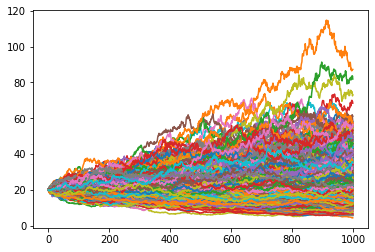


ESP = 25.68050833375483
Moyenne emp. = 30.7763103732167
Err. rel. = 0.3271569668539135


In [ ]:
plt.figure()
for S in S_data:
    plt.plot(S)
plt.show()

E = S0 * np.exp(mu * T)
moyenne = np.mean(S_data[:][-1])
err_rel = abs(moyenne - S0 * np.exp(mu * T)) / S0 * np.exp(mu * T)

print()
print("ESP =", E)
print("Moyenne emp. =", moyenne)
print("Err. rel. =", err_rel)

Modèle stochastique de Vasicek:

On suppose sur (Omega, (Ft)t, P) que le taux r vérifie l'EDS:

d(rt) = a * (b - rt) * dt + gamma * dWt

Avec r0 = 10/100, a= 0.3, b=2/100, gamma = 10/100

Prix ZC de nominal N et maturité T = N*B(0,T) où B(0,T) = E * exp( - intégral de 0 à T de (rt dt))

Obj: estimer B(0,T) = E * e^-I(t), I(t) = intégrale de 0 à T de (rt dt)

LGN => Trajectoires indépendantes (r_j) j=de 1 à N, I_j(t)

X_j = e^(-I_j(T)) sont iid => B(0,T) = lim (1/N * (X_1 + X_2 +...+ X_N)) n->+inf

Simuler:


t_i_n = pas * i, pas = T/n

rt_i_n - rt_i_n-1 = a * (b - rt_i_n-1)

In [ ]:
T = 5
n = 1000
N = 1000
step = T / n

r0 = 1 / 100
a = 0.3
b = 2 / 100
gamma = 10 / 100


def r_t():
    rt = [r0]
    for i in range(0, n):
        rt.append(
            rt[-1] + a * (b - rt[-1]) * step + gamma * np.sqrt(step) * np.random.randn()
        )
    return rt


def I_t(rt):
    return T * np.mean(rt)

In [ ]:
X = []
for j in range(0, N):
    X_j = np.exp(-I_t(r_t()))
    X.append(X_j)

B_O_T = np.mean(X)
print(B_O_T)

0.9987564652915412


**Modèle stochastique à volatilité locale**

Si le prix actualisé S_tild = S_t/S0_t est une martingale sous une probabilité Q~P (appelée proba risque neutre) alors **AOA**

Un marché est dit complet si tout payoff borné est réplicable par un pf. autofinancé càd Vt = Et (ksy)

**Théoreme:** Supposons NA est vérfié. Alors le marché est complet ssi il existe une unique probabilité de risque neutre. De plus dans ce cas, tout payoff intégrable sous la probabilité du risque neutre est réplicable

Enfin sous certaines conditions de modèles, on peut démontrer que tout pf. autofinancé de valeur terminale intégrable est une Q-martingale sous Q proba de risque neutre.

**Déf.:** Pour un marché complet, le prix d'un payoff Ksy_t réplicable est la valeur répliquant Ksy_T.

Comme le pf. réplicant Ksy_t est une martingale sous Q alors, pour tout t:

V_tild_t = ESP(V_tild_T/ Ft) où V_tild_T = V_T/S_0_T 

...

Vt = E_Q [S_0_t / S_0_t * Ksy_T | F_t]

